# Usefull code for lab


In [1]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

### Graph generation


In [3]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

In [4]:
G = gnp_random_connected_graph(10, 1, False)

# Algorithms of minimal tree


### Kraskal algorithm


#### built-in kraskal


In [5]:
from networkx.algorithms import tree

[(0, 7, {'weight': -1}), (1, 4, {'weight': -3}), (1, 2, {'weight': 0}), (3, 7, {'weight': -1}), (3, 9, {'weight': 10}), (4, 7, {'weight': -4}), (5, 8, {'weight': -2}), (6, 7, {'weight': -3}), (7, 8, {'weight': -1})]


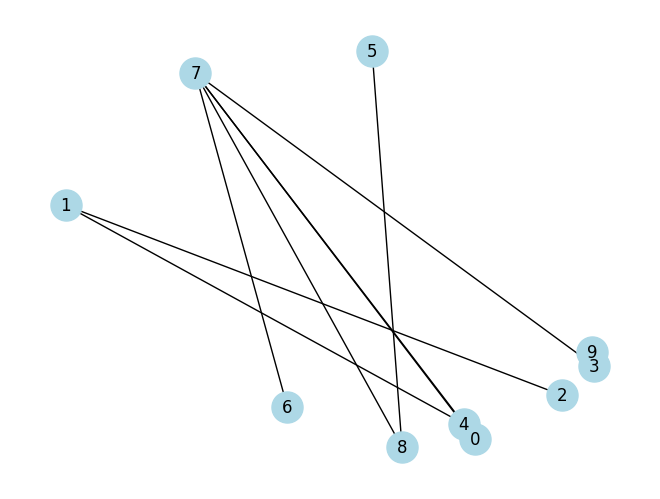

In [6]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")
print(mstk.edges(data=True))
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

#### Own kraskal

In [7]:
def kraskal_algorithm(G, draw: bool = False):
  len_nodes = len(list(G.nodes()))
  visited_nodes = []
  sorted_edges = sorted(G.edges(data=True), key = lambda x: x[2]['weight'])
  visited_nodes.append({sorted_edges[0][0], sorted_edges[0][1]})
  edges = [sorted_edges.pop(0)]

  while len(edges)  < len_nodes - 1:
    #work until nodes - 1 edges are not added
    for edge in sorted_edges:
      #pass throught all sorted edges and check if it not in any set of graphs
      if not (any(edge[0] in i for i in visited_nodes) or any(edge[1] in i for i in visited_nodes)):
        #if not,  add edge and add new set to visited nodes
        edges.append(edge)
        sorted_edges.remove(edge)
        visited_nodes.append({edge[0], edge[1]})
        break

      elif any((edge[0] in i) ^ (edge[1] in i) for i in visited_nodes):
        #If two nodes of edge are in sets of visited nodes, but not two in same set add edge
        edges.append(edge)
        sorted_edges.remove(edge)
        #Update sets in visited nodes
        for i in visited_nodes:
          if edge[0] in i or edge[1] in i:
            i.update({edge[0], edge[1]})
            for j in visited_nodes:
              if j!= i and (edge[0] in j or edge[1] in j):
                i.update(j)
                visited_nodes.remove(j)
                break
            break
        break
  
  #create graph with already added edges
  new_G = nx.Graph()
  new_G.add_nodes_from(G.nodes())
  for edge in edges:
    new_G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])
  #draw graph, if required
  if draw:
    nx.draw(new_G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
  return new_G


Check if edges of own graph are similar to edges of built algorithms graph

In [8]:
kraskal_algorithm(G).edges() == tree.minimum_spanning_tree(G, algorithm="kruskal").edges()

True

### Prim's algorithm


In [9]:
def prim_algorithm(G, draw: bool = False, start_node: int = 0):
  len_nodes = len(list(G.nodes()))
  visited_nodes = {start_node}
  sorted_edges = sorted(G.edges(data=True), key = lambda x: x[2]['weight'])
  edges = []
  while len(edges)  < len_nodes - 1:
    #work until nodes - 1 edges are not added
    for edge in sorted_edges:
      #pass throught all sorted edges and check if any of two nodes of edge are in set of visited nodes, but not two of them
      if (edge[0] in visited_nodes) ^ (edge[1] in visited_nodes):
        #If True, append edge to edges and update set of visited nodes
        edges.append(edge)
        sorted_edges.remove(edge)
        visited_nodes.update({edge[0], edge[1]})
        break
  
  #create graph with already added edges
  new_G = nx.Graph()
  new_G.add_nodes_from(G.nodes())
  for edge in edges:
    new_G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

  #draw graph, if required
  if draw:
    nx.draw(new_G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
  return new_G

Check if value of minimal spanning tree of main algorithm and built-in are the same

In [19]:
value_of_minspantree_built = 0
value_of_minspantree_own = 0

for edge in tree.minimum_spanning_tree(G, algorithm="prim").edges(data=True):
    value_of_minspantree_built += edge[2]['weight']

for edge in prim_algorithm(G).edges(data=True):
    value_of_minspantree_own += edge[2]['weight']

value_of_minspantree_own == value_of_minspantree_built


True

# Comperasion with built-in algorithm

In [12]:
from networkx.algorithms import tree

In [13]:
import time
from tqdm import tqdm

In [14]:
def comparison_prim(nodes: int, prim_algo, start_point: int = 0):
  NUM_OF_ITERATIONS = 1000
  time_taken = 0
  time_taken_built = 0
  for i in tqdm(range(NUM_OF_ITERATIONS)):
      
      # note that we should not measure time of graph creation
      G = gnp_random_connected_graph(nodes, 0.5, False)
      
      start = time.time()
      G_own = prim_algo(G)
      end = time.time()
      
      time_taken += end - start

      start_built = time.time()
      G_built = tree.minimum_spanning_tree(G, algorithm="prim")
      end_built = time.time()

      time_taken_built +=  end_built - start_built
  return(time_taken/NUM_OF_ITERATIONS, time_taken_built/NUM_OF_ITERATIONS)

In [15]:
def comparison_kruskal(nodes: int, kruskal_algo):
  NUM_OF_ITERATIONS = 1000
  time_taken = 0
  time_taken_built = 0
  for i in tqdm(range(NUM_OF_ITERATIONS)):
      
      # note that we should not measure time of graph creation
      G = gnp_random_connected_graph(nodes, 0.5, False)
      
      start = time.time()
      G_own = kruskal_algo(G)
      end = time.time()
      
      

      start_built = time.time()
      G_built = tree.minimum_spanning_tree(G, algorithm="kruskal")
      end_built = time.time()

      time_taken += end - start
      time_taken_built +=  end_built - start_built
      
  return(time_taken/NUM_OF_ITERATIONS, time_taken_built/NUM_OF_ITERATIONS)

### Plot of comparison with built-in algorithm


100%|██████████| 1000/1000 [03:12<00:00,  5.20it/s]


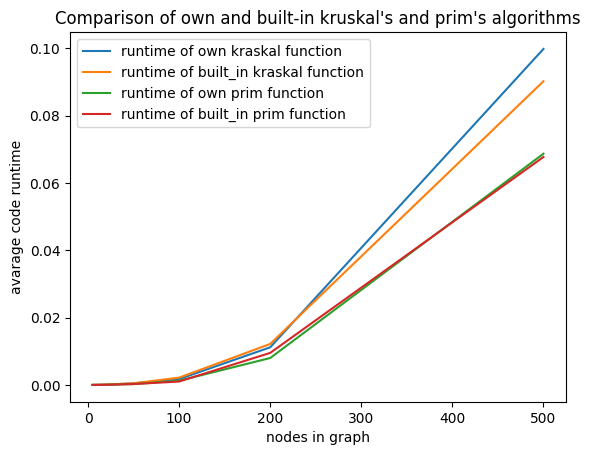

In [21]:
nodes_amount = [5, 10, 20, 50, 100, 200, 500]
own_maked_time_kras = []
own_maked_time_prim = []
built_in_time_kras = []
built_in_time_prim = []
for nodes in nodes_amount:
  own_func_kras, built_in_func_kras = comparison_kruskal(nodes, kraskal_algorithm)
  own_func_prim, built_in_func_prim = comparison_prim(nodes, prim_algorithm)
  own_maked_time_kras.append(own_func_kras)
  built_in_time_kras.append(built_in_func_kras)
  own_maked_time_prim.append(own_func_prim)
  built_in_time_prim.append(built_in_func_prim)

plt.plot(nodes_amount, own_maked_time_kras, label ='runtime of own kraskal function')
plt.plot(nodes_amount, built_in_time_kras, label ='runtime of built_in kraskal function')
plt.plot(nodes_amount, own_maked_time_prim, label ='runtime of own prim function')
plt.plot(nodes_amount, built_in_time_prim, label ='runtime of built_in prim function')
plt.xlabel('nodes in graph')
plt.ylabel('avarage code runtime')
plt.title("Comparison of own and built-in kruskal's and prim's algorithms")
plt.legend()